The stock market is a place where investors buy and sell shares of publicly traded companies. It's essentially a marketplace where individuals and institutions come together to trade stocks, bonds, and other securities. Companies issue stocks as a way to raise capital for various purposes, and investors buy these stocks to own a portion of the company and potentially profit from its growth.

Stock market prediction is a complex and challenging task that has attracted significant attention from investors, researchers, and analysts. The primary problem revolves around the inherent difficulty of accurately forecasting future market trends and movements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression

In [2]:
tesla = pd.read_csv("/content/tesla.csv")

In [3]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
tesla["Date"] = pd.to_datetime(tesla["Date"])

<ipython-input-5-00106f94d9eb>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tesla["Date"] = pd.to_datetime(tesla["Date"])


In [6]:
print(f"DataFrame contains stock prices between {tesla.Date.min()} {tesla.Date.max()}")

DataFrame contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00


In [7]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


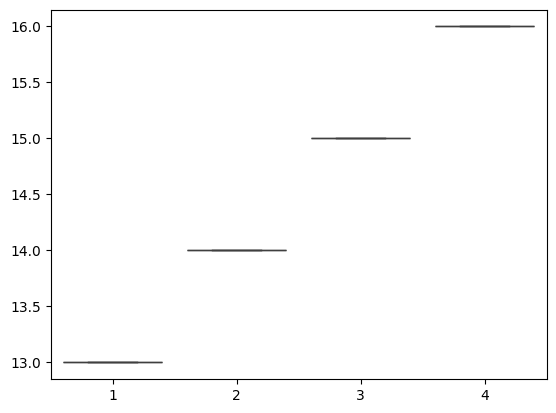

In [8]:
data = {"Open":[1,2,3,4], "High":[5,6,7,8], "Low":[9,10,11,12], "Close":[13,14,15,16]}
sns.boxplot(x = data["Open"], y = data["Close"])
plt.show()

<ipython-input-9-278f1787d0f6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["High"], color="g", shade=True)
<ipython-input-9-278f1787d0f6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["Low"], color="r", shade=True)


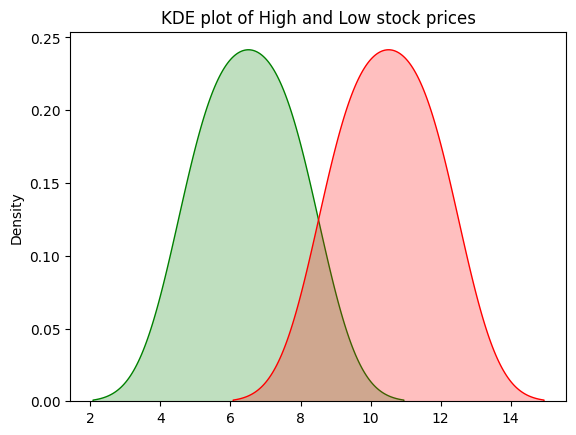

In [9]:
sns.kdeplot(data["High"], color="g", shade=True)
sns.kdeplot(data["Low"], color="r", shade=True)
plt.title("KDE plot of High and Low stock prices")
plt.show()

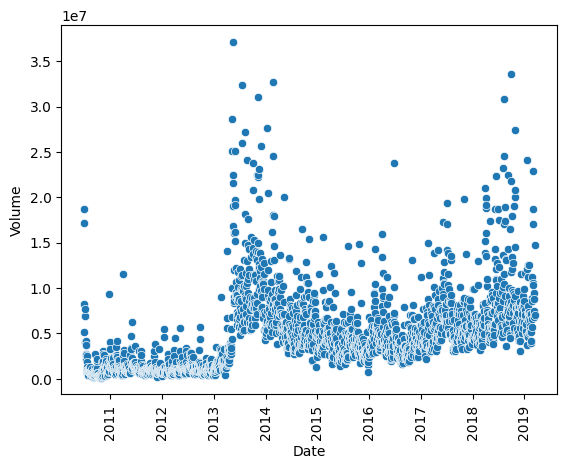

In [10]:
sns.scatterplot(x = tesla["Date"], y = tesla["Volume"])
plt.xticks(rotation="vertical")
plt.show()

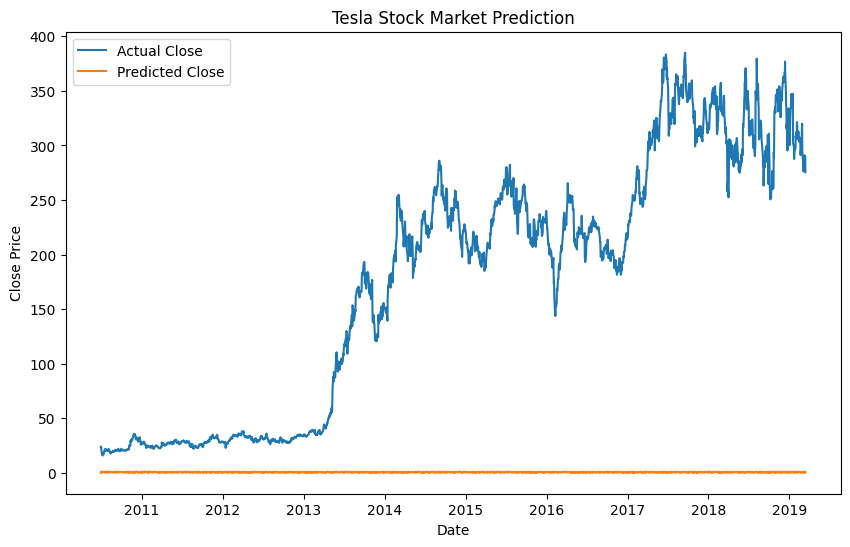

In [11]:
tesla["Predicted_Close"] = np.random.rand(len(tesla))

# Plot the actual and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(tesla["Date"], tesla["Close"], label="Actual Close")
plt.plot(tesla["Date"], tesla["Predicted_Close"], label="Predicted Close")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Tesla Stock Market Prediction")
plt.legend()
plt.show()


#**Data Modelling**

In [12]:
#for Building Regreesion Model
X = np.array(tesla.index).reshape(-1,1)
y = tesla["Close"]

In [13]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 101)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1535, 1)
(658, 1)
(1535,)
(658,)


In [15]:
scaler = StandardScaler().fit(X_train)

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_train = lm.predict(X_train)
lm_test = lm.predict(X_test)

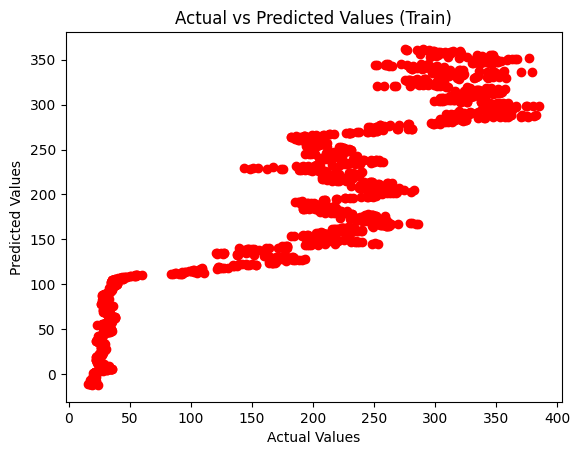

In [17]:
plt.scatter(y_train, lm.predict(X_train), color = "r")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Train)")
plt.show()

#**Model Evaluation**

In [18]:
#Lets define a function for Model Evaluation
def model_eval(actual, predicted):
  rmse = np.sqrt(mse(actual, predicted))
  r2 = r2_score(actual, predicted)
  print('The RMSE value for the model is: ', round(rmse,2))
  print('The R2 Score for the model is: ', round(r2, 2))

In [19]:
model_eval(y_train, lm_train)

The RMSE value for the model is:  42.68
The R2 Score for the model is:  0.87


In [20]:
model_eval(y_test, lm_test)

The RMSE value for the model is:  42.2
The R2 Score for the model is:  0.86


#**Google Train and Test**

In [21]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [22]:
data = pd.read_csv("/content/Google_train_data.csv")

In [23]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [25]:
data["Close"]=pd.to_numeric(data.Close,errors="coerce")
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [28]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [29]:
X_train = []
y_train = []

for i in range (60,1149):
  X_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [30]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [31]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [32]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 14s - loss: 0.0316 - 14s/epoch - 392ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0087 - 5s/epoch - 129ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0069 - 6s/epoch - 186ms/step
Epoch 4/20
35/35 - 5s - loss: 0.0062 - 5s/epoch - 138ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0072 - 4s/epoch - 128ms/step
Epoch 6/20
35/35 - 6s - loss: 0.0061 - 6s/epoch - 157ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0063 - 5s/epoch - 129ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0218 - 5s/epoch - 132ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0058 - 5s/epoch - 154ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0060 - 4s/epoch - 128ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0050 - 5s/epoch - 157ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0055 - 4s/epoch - 127ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0052 - 4s/epoch - 127ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0048 - 6s/epoch - 158ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0044 - 4s/epoch - 128ms/step
Epoch 16/20
35/35 - 5s - loss: 0.0046 - 5s/epoch - 144ms/step
Epoch 17/20
35/

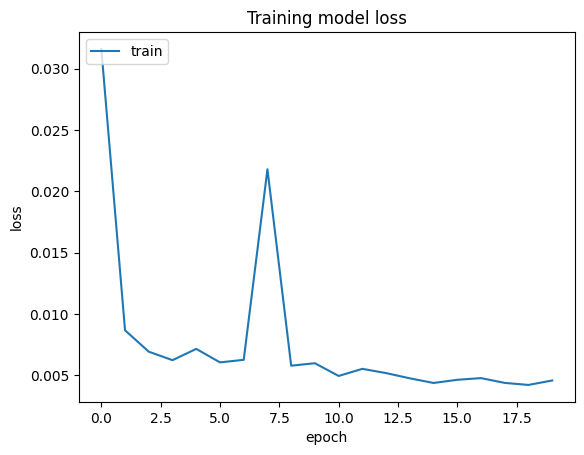

In [33]:
plt.plot(hist.history["loss"])
plt.title("Training model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")
plt.show()

#**Google Test**

In [34]:
testData = pd.read_csv("/content/Google_test_data.csv")

In [35]:
testData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [36]:
testData["Close"]=pd.to_numeric(testData.Close, errors="coerce")
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape

X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [37]:
y_pred = model.predict(X_test)

6/6 [==============================] - 3s 69ms/step


In [38]:
y_pred

array([[4.171547 ],
       [4.171524 ],
       [4.17131  ],
       [4.1712594],
       [4.1713133],
       [4.171495 ],
       [4.1716065],
       [4.1716313],
       [4.171531 ],
       [4.1715026],
       [4.1717286],
       [4.1718106],
       [4.1717944],
       [4.171878 ],
       [4.171777 ],
       [4.171755 ],
       [4.1715026],
       [4.1713586],
       [4.1712365],
       [4.1710963],
       [4.1713223],
       [4.171326 ],
       [4.171524 ],
       [4.1716113],
       [4.171598 ],
       [4.1715307],
       [4.171508 ],
       [4.1716084],
       [4.1718144],
       [4.171854 ],
       [4.171923 ],
       [4.172048 ],
       [4.1723123],
       [4.1724825],
       [4.1721964],
       [4.1720366],
       [4.1719823],
       [4.171953 ],
       [4.1718726],
       [4.1720066],
       [4.17175  ],
       [4.171635 ],
       [4.1715174],
       [4.171455 ],
       [4.1714377],
       [4.171497 ],
       [4.171597 ],
       [4.171467 ],
       [4.171383 ],
       [4.171284 ],


In [39]:
predicted_price = sc.inverse_transform(y_pred)

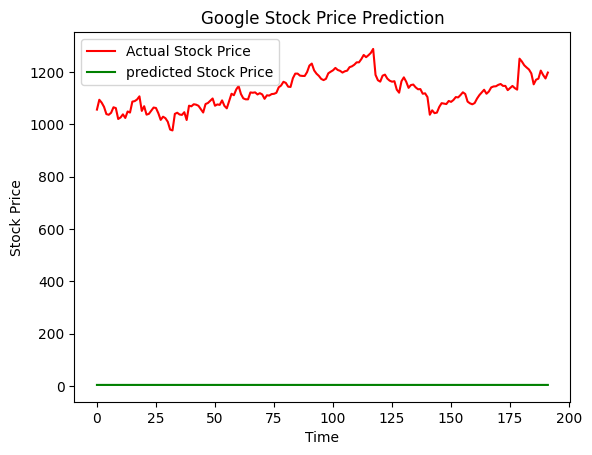

In [40]:
plt.plot(y_test, color = "red", label = "Actual Stock Price")
plt.plot(predicted_price, color = "green", label = "predicted Stock Price")
plt.title("Google Stock Price Prediction")
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.legend()
plt.show()